In [60]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# 01 : Dataset Preparation

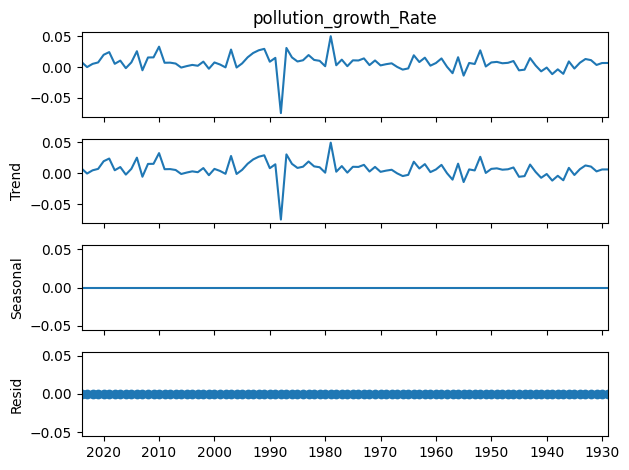

In [82]:
# Read the DataFrame from CSV file
df = pd.read_csv('/content/most-polluted-countries.csv')

# Generate the date range in reverse order
df['Years'] = pd.date_range(end='2024-01-01', periods=len(df), freq='Y')[::-1]

# Set the 'Years' column as the index
df.set_index('Years', inplace=True)

# Plotting the time series
decomposition = seasonal_decompose(df['pollution_growth_Rate'], model = 'additive')
fig = decomposition.plot()
plt.show()

# 02 : Stationary Testing

In [83]:
# Assuming df is your DataFrame with the time series data

# Perform Augmented Dickey-Fuller test
result = adfuller(df['pollution_growth_Rate'])

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


ADF Statistic: -10.620220592639203
p-value: 5.54007892024703e-19
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226


# 03 : Arima Model Identification

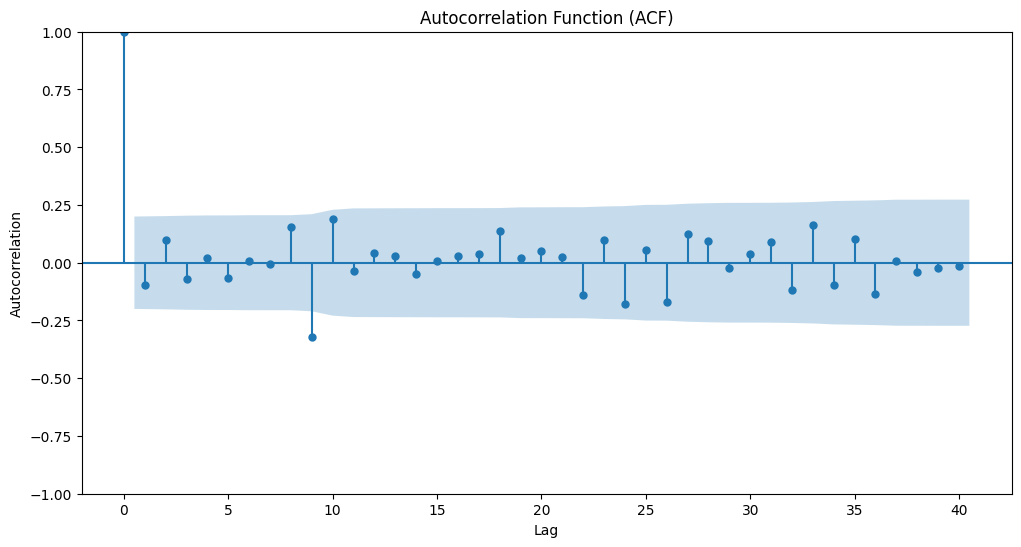

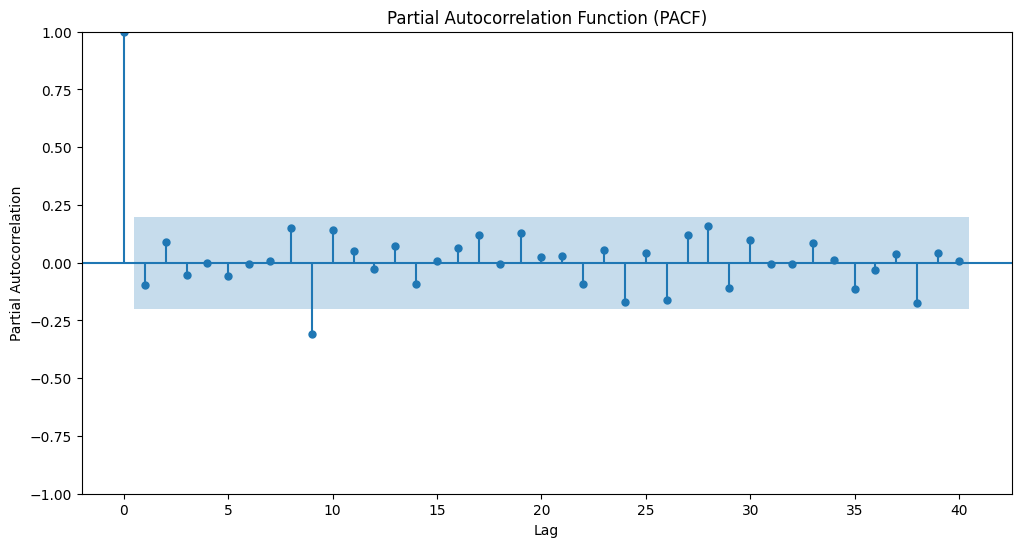

In [84]:
# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['pollution_growth_Rate'], lags=40, ax=plt.gca())  # Adjust lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['pollution_growth_Rate'], lags=40, ax=plt.gca())  # Adjust lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


# 04 : Arima Model Fitting

In [85]:
model = ARIMA(df['pollution_growth_Rate'], order = (1, 1, 1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

                                 SARIMAX Results                                 
Dep. Variable:     pollution_growth_Rate   No. Observations:                   96
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 273.751
Date:                   Thu, 28 Mar 2024   AIC                           -541.503
Time:                           19:48:21   BIC                           -533.841
Sample:                                0   HQIC                          -538.407
                                    - 96                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1125      0.123     -0.916      0.360      -0.353       0.128
ma.L1         -0.9607      0.059    -16.177      0.000      -1.077      -0.844
sigma2         0.0002   1.27

# 05 : Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


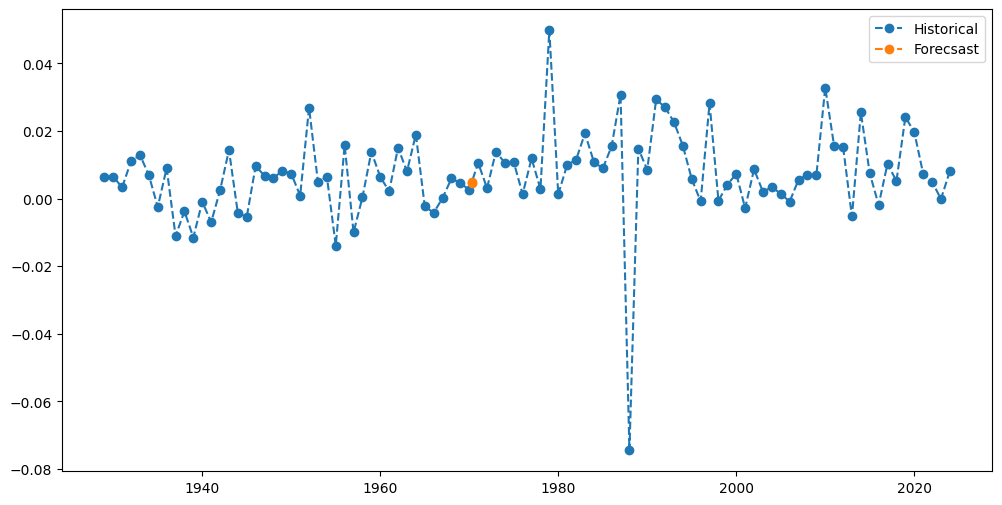

In [87]:
forecast = result.forecast(steps = 2)

plt.figure(figsize = (12 , 6))
plt.plot(df.index, df['pollution_growth_Rate'], marker = 'o', linestyle = 'dashed', label = 'Historical')
plt.plot(forecast.index, forecast,marker ='o', linestyle = 'dashed', label = "Forecsast")
plt.legend()
plt.show()

The findings from pollution analysis and ARIMA modeling have direct implications for environmental policy and management. By forecasting pollution trends, policymakers can target interventions more effectively, allocating resources where they're most needed. These insights aid in developing tailored policies to address seasonal variations or long-term trends in pollution levels. Additionally, real-time monitoring and comparison with model predictions allow for ongoing evaluation and adjustment of policies, fostering adaptive management strategies. Overall, integrating data-driven approaches like ARIMA modeling enhances decision-making processes, improves resource allocation, and fosters sustainable environmental management practices.

# Good evening, sir.

I apologize for the delay in submitting Exercise 8. I understand the importance of timely submissions and deeply regret any inconvenience caused.

The reason for my delayed submission is that my grandfather passed away. I have been occupied with assisting my family with the funeral arrangements and other necessary tasks.

Thank you for your understanding during this difficult time.
